In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import ttest_ind
from tqdm import tqdm

## Задание 1.
**Проведите исследование того, как мощность T-test зависит от пропорций выборки.**
1) Для этого сгенерируйте выборку из 1000000 значений из нормального распределения со средний значением 100 и СКО 1000.
2) Далее разделите выборку в пропорции 50 на 50
3) Проведите синтетический AB тест, в котором группе B дайте разные размеры эффект (от 1% до 100% с шагом в 10%)
4) Посчитайте вероятность ошибки 2 рода
5) Повторите операции для выборок с пропорцией: 10 на 90, 20 на 80, 30 на 70, 40 на 60, где меньшее значение - это будет размер контрольной группы, а большее - размер тестовой группы
6) Постройте график, где по оси X будет размер эффекта, по оси Y вероятность ошибки 2 рода, а каждая линия соответсвует одной из пропорции

***

Я не совсем поняла условия задания... Нужно было сначала сгенерировать выборку из 1000000 значений, а из неё брать подвыборки? Или проводить эксперимент несколько раз? В любом случае, код остаётся практически идентичным (с точностью до того, от каких данных запущена функция), поэтому для начала я выполнила задание в понимании, что эксперимент с 1000000 значений нужно проделать несколько раз.

In [53]:
def analyze_type_2_errors(n_size, prop_1 = 0.5, need_print=True):
    type_2_errors = np.zeros(11)
    effects = [i for i in range(1, 102, 10)]
    for index, effect in enumerate(effects):
        for j in range(1000):
            sample = np.random.normal(loc=100, scale=1000, size=n_size)
            sample_1 = sample[: int(sample.size * prop_1)]
            sample_2 = sample[int(sample.size * prop_1) : ]
            sample_2_eff = sample_2 + (effect / 100) * sample_2.mean()
            t_stat, p_value = ttest_ind(sample_1, sample_2_eff)
            if p_value > 0.05:
                type_2_errors[index] += 1

    if need_print:
        for index, effect in enumerate(effects):
            print(f"Эффект: {effect}%, Вероятность ошибки II рода: {(type_2_errors[index] / 10):.2f}%")
    return type_2_errors / 10


In [56]:
result = analyze_type_2_errors(1000000, need_print=True)

Эффект: 1%, Вероятность ошибки II рода: 93.10%
Эффект: 11%, Вероятность ошибки II рода: 0.00%
Эффект: 21%, Вероятность ошибки II рода: 0.00%
Эффект: 31%, Вероятность ошибки II рода: 0.00%
Эффект: 41%, Вероятность ошибки II рода: 0.00%
Эффект: 51%, Вероятность ошибки II рода: 0.00%
Эффект: 61%, Вероятность ошибки II рода: 0.00%
Эффект: 71%, Вероятность ошибки II рода: 0.00%
Эффект: 81%, Вероятность ошибки II рода: 0.00%
Эффект: 91%, Вероятность ошибки II рода: 0.00%
Эффект: 101%, Вероятность ошибки II рода: 0.00%


Как можно заметить, эффект в 1% уловить практически невозможно (с интуитивной точки зрения это и логично, поскольку мы не можем быть уверены, является ли такой маленький процент действительно эффектом или это просто случайность нашей выборки). Но при нашем достаточно большом объёме выборки и большом количество интераций эксперимента эффекты в 11 и более процентов мы ловим всегда. Потому что мощность статистического теста напрямую зависит от размера выборки. При больших выборках выборочное среднее стремится к истинному среднему значению генеральной совокупности, что позволяет более точно оценивать даже небольшие эффекты (ЗБЧ + состоятельность оценки). Давайте ради интереса проведём этот же тест, то генерировать будем выборку из 10000 величин. 

In [26]:
result = analyze_type_2_errors(10000)

Эффект: 1%, Вероятность ошибки II рода: 93.10%
Эффект: 11%, Вероятность ошибки II рода: 89.70%
Эффект: 21%, Вероятность ошибки II рода: 79.80%
Эффект: 31%, Вероятность ошибки II рода: 62.90%
Эффект: 41%, Вероятность ошибки II рода: 46.30%
Эффект: 51%, Вероятность ошибки II рода: 33.10%
Эффект: 61%, Вероятность ошибки II рода: 23.60%
Эффект: 71%, Вероятность ошибки II рода: 12.80%
Эффект: 81%, Вероятность ошибки II рода: 6.90%
Эффект: 91%, Вероятность ошибки II рода: 4.90%
Эффект: 101%, Вероятность ошибки II рода: 2.50%


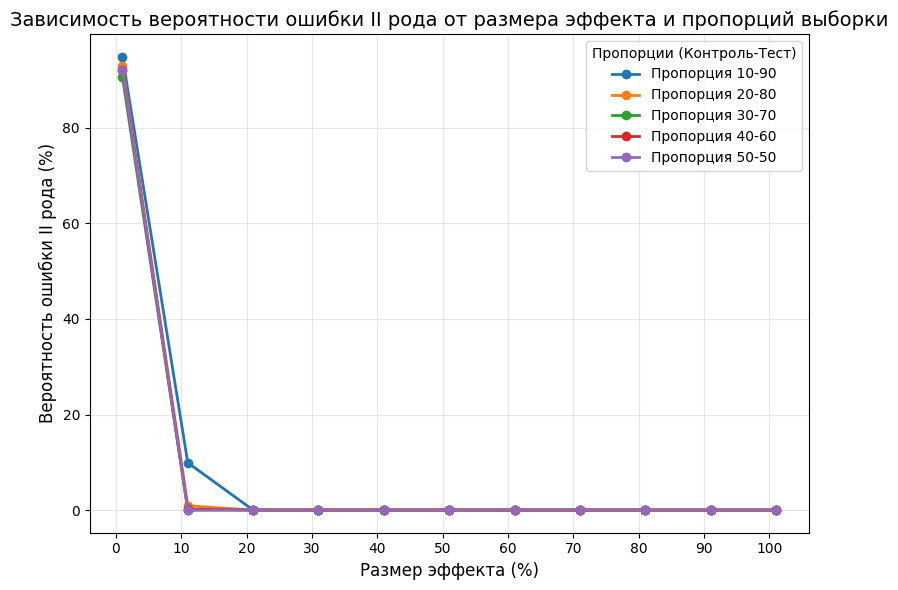

In [48]:
plt.figure(figsize=(8, 6))
proportions = [0.1, 0.2, 0.3, 0.4, 0.5]
effects = list(range(1, 102, 10))

for prop in proportions:
   type_2_probs = analyze_type_2_errors(1000000, prop_1=prop, need_print=False)
   plt.plot(effects, type_2_probs, label=f'Пропорция {int(prop*100)}-{int((1-prop)*100)}', marker='o', linewidth=2)


plt.title("Зависимость вероятности ошибки II рода от размера эффекта и пропорций выборки", fontsize=14)
plt.xlabel("Размер эффекта (%)", fontsize=12)
plt.ylabel("Вероятность ошибки II рода (%)", fontsize=12)
plt.legend(title="Пропорции (Контроль-Тест)")
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 101, 10))

plt.tight_layout()
plt.show()

Из-за того, что в задании просили брать очень большую выборку, на графике не так ярко заметно поведение ломанных. Давайте (опять же, ради интереса), сделаем то же самое, то для выборки поменьше. И посмотрим на разницу в зависимости от пропорций деления на A и B категории.

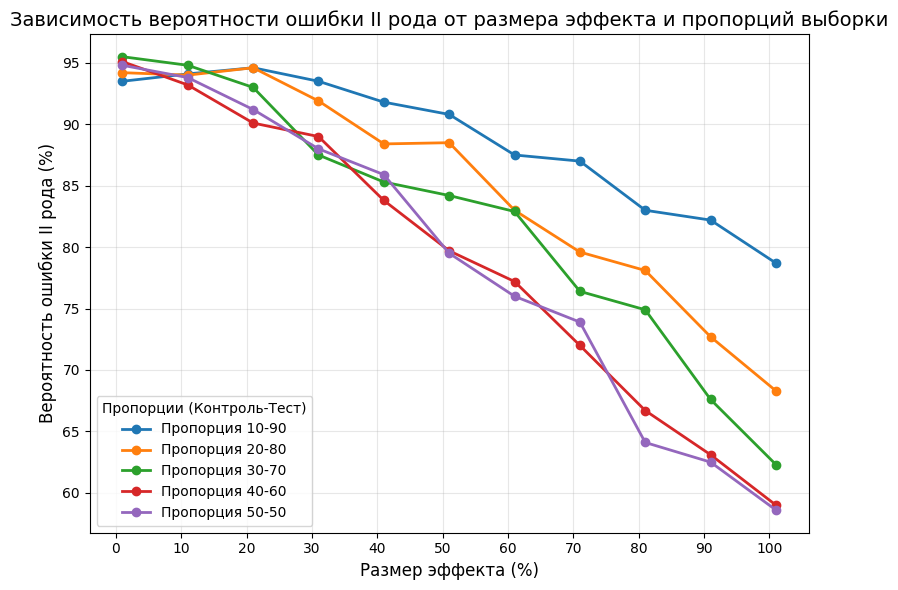

In [49]:
plt.figure(figsize=(8, 6))
proportions = [0.1, 0.2, 0.3, 0.4, 0.5]
effects = list(range(1, 102, 10))

for prop in proportions:
   type_2_probs = analyze_type_2_errors(1000, prop_1=prop, need_print=False)
   plt.plot(effects, type_2_probs, label=f'Пропорция {int(prop*100)}-{int((1-prop)*100)}', marker='o', linewidth=2)


plt.title("Зависимость вероятности ошибки II рода от размера эффекта и пропорций выборки", fontsize=14)
plt.xlabel("Размер эффекта (%)", fontsize=12)
plt.ylabel("Вероятность ошибки II рода (%)", fontsize=12)
plt.legend(title="Пропорции (Контроль-Тест)")
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 101, 10))

plt.tight_layout()
plt.show()

Ниже представлен вариант точно такого же эксперимента, но где выборки sample_1 и sample_2 являются подвыборками изначальной большой выборки.

In [30]:
from numpy import ceil


def analyze_vers_2(n_size, s_size, prop_1, need_print=True):
    sample = np.random.normal(loc=100, scale=1000, size=n_size)
    type_2_errors = np.zeros(11)
    effects = [i for i in range(1, 102, 10)]
    for index, effect in enumerate(effects):
        for j in range(1000):
            sample_1 = np.random.choice(sample, size=int(ceil(s_size * prop_1)), replace=False)
            sample_2 = np.random.choice(sample, size=int(ceil(s_size * (1 - prop_1))), replace=False)
            sample_2_eff = sample_2 + (effect / 100) * sample_2.mean()
            t_stat, p_value = ttest_ind(sample_1, sample_2_eff)
            if p_value > 0.05:
                type_2_errors[index] += 1

    if need_print:
        for index, effect in enumerate(effects):
            print(f"Эффект: {effect}%, Вероятность ошибки II рода: {(type_2_errors[index] / 10):.2f}%")
    return type_2_errors / 10

result = analyze_vers_2(1000000, 1000, 0.5)

Эффект: 1%, Вероятность ошибки II рода: 93.80%
Эффект: 11%, Вероятность ошибки II рода: 93.40%
Эффект: 21%, Вероятность ошибки II рода: 91.70%
Эффект: 31%, Вероятность ошибки II рода: 86.80%
Эффект: 41%, Вероятность ошибки II рода: 84.50%
Эффект: 51%, Вероятность ошибки II рода: 82.30%
Эффект: 61%, Вероятность ошибки II рода: 74.20%
Эффект: 71%, Вероятность ошибки II рода: 69.80%
Эффект: 81%, Вероятность ошибки II рода: 67.00%
Эффект: 91%, Вероятность ошибки II рода: 62.50%
Эффект: 101%, Вероятность ошибки II рода: 57.90%


## Задание 2.
**Подведение результатов эксперимента**
1) Откройте файл с данными `data_with_test_results.csv`
2) Посчитайте посчитайте количество заказов у каждого клиента за период эксперимента
3) Посчитайте насколько значимы изменения среднего количества заказов у клиента в группе B по сравнению с группой А с помощью t-теста и бутстрапа
4) Постройте график с кумулятивным среднийм значеним в группе A и B и посмотрите насколько этот эффект виден 

In [3]:
df = pd.read_csv("data_with_test_results.csv")

grouped_df = df.groupby(["user_id", "group"]).agg(
    orders_cnt=("orders_cnt", "sum")
).reset_index()

dfA = grouped_df[grouped_df["group"] == "A"]
dfB = grouped_df[grouped_df["group"] == "B"]
print(dfA.head())
print(dfB.head())

   user_id group  orders_cnt
0        1     A           5
2        3     A           5
3        4     A           6
4        5     A           6
6        7     A           8
    user_id group  orders_cnt
1         2     B           4
5         6     B           8
9        10     B           5
14       15     B           2
16       17     B           4


In [4]:
t_value, p_value = ttest_ind(dfA["orders_cnt"], dfB["orders_cnt"])
print("T-value:", t_value)
print("P-value:", p_value)

T-value: -2.0058201567889458
P-value: 0.045144960042168794


In [12]:
def bootstrap_means(data_A, data_B, n=10000):
    differences = []
    o_diff = np.mean(data_B) - np.mean(data_A)
    combined_data = np.concatenate([data_A, data_B])
    for _ in range(n):
        bootstrap_A = np.random.choice(combined_data, size=len(data_A), replace=True)
        bootstrap_B = np.random.choice(combined_data, size=len(data_B), replace=True)

        diff = np.mean(bootstrap_B) - np.mean(bootstrap_A)
        differences.append(diff)
    p_value = np.mean(np.abs(differences) >= np.abs(o_diff))
    return np.array(differences), p_value

bootstrap_diffs, p_value_bootstrap = bootstrap_means(dfA["orders_cnt"], dfB["orders_cnt"])
ci_bootstrap = np.percentile(bootstrap_diffs, [2.5, 97.5])

In [14]:
print(f"Бутстрап p-value = {p_value_bootstrap:.4f}")
print(f"95% доверительный интервал: [{ci_bootstrap[0]:.3f}; {ci_bootstrap[1]:.3f}]")

Бутстрап p-value = 0.0459
95% доверительный интервал: [-0.429; 0.433]


0 входит в доверительный интервал. Значит, пока мы гипотезу принимаем. Также p-value < 5% в обоих случаях (и бутстрап, и рассчёт через t_test), что тоже может послжить шагом для принятия гипотезы

Также не совсем понятно, что ожидается от нас в 4 пункте задания :(

Поэтому на всякий случай объясню, как его поняла я и что я в ходе задания сделала. Я сгрупировала данные по пользователям и дням, далее я считаю среднее по уже прошедшим до текущего момента датам в каждой из групп, и в конце я строю график кумулятивного среднего по дням.

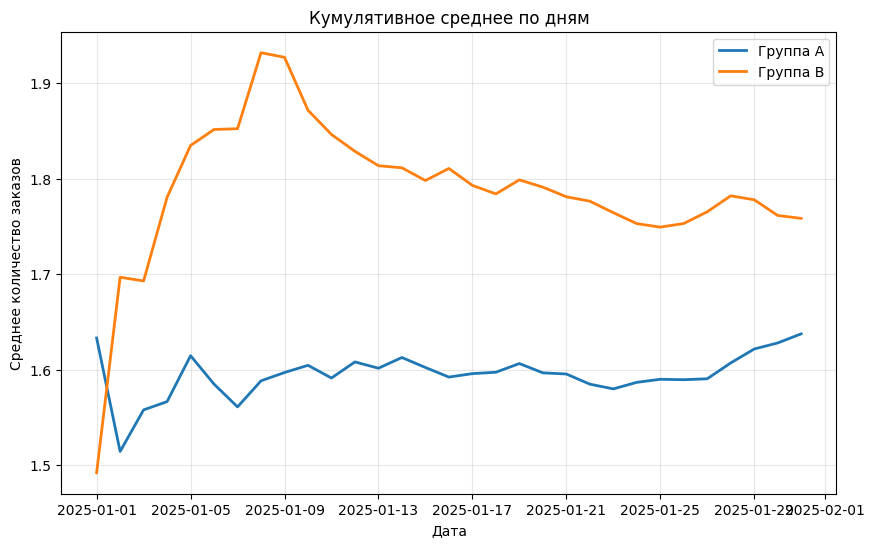

In [18]:
df['order_date'] = pd.to_datetime(df['order_date'])

user_daily_orders = df.groupby(['user_id', 'order_date', 'group'])['orders_cnt'].sum().reset_index()
daily_means = user_daily_orders.groupby(['order_date', 'group'])['orders_cnt'].mean().reset_index()
daily_means = daily_means.sort_values('order_date')

c_data = []
mean_a, mean_b = 0, 0
count_a, count_b = 0, 0
for date in sorted(daily_means['order_date'].unique()):
    day_data = daily_means[daily_means['order_date'] == date]
    for _, row in day_data.iterrows():
        if row['group'] == 'A':
            count_a += 1
            mean_a = (mean_a * (count_a - 1) + row['orders_cnt']) / count_a
        else:
            count_b += 1
            mean_b = (mean_b * (count_b - 1) + row['orders_cnt']) / count_b
    c_data.append({
        'date': date,
        'cum_mean_A': mean_a,
        'cum_mean_B': mean_b
    })
c_df = pd.DataFrame(c_data)

plt.figure(figsize=(10, 6))
plt.plot(c_df['date'], c_df['cum_mean_A'], label='Группа A', linewidth=2)
plt.plot(c_df['date'], c_df['cum_mean_B'], label='Группа B', linewidth=2)
plt.title('Кумулятивное среднее по дням')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
final_diff = c_df['cum_mean_B'].iloc[-1] - c_df['cum_mean_A'].iloc[-1]
relative_effect = (final_diff / c_df['cum_mean_A'].iloc[-1]) * 100

print(f"Значение Group A: {c_df['cum_mean_A'].iloc[-1]:.3f}")
print(f"Значение Group B: {c_df['cum_mean_B'].iloc[-1]:.3f}")
print(f"Абсолютная разница: {final_diff:.3f}")
print(f"Относительный эффект: {relative_effect:.1f}%")

Значение Group A: 1.638
Значение Group B: 1.759
Абсолютная разница: 0.121
Относительный эффект: 7.4%


## Задание 3.
**Дизайн эксперимента**
1) Откройте файл с данными `dataset_for_design`
2) Рассчитайте количество наблюдений, которое необходимо набрать, чтобы у этой метрики увидеть ее увеличение на 5%
3) Проверьте свой ответ с помощью метода Монте-Карло. Покажите, что мощность теста действительно совпадает с заявленной



In [8]:
df = pd.read_csv("dataset_for_design.csv")
df.head()

,Unnamed: 0,user_id,total_orders
0,0,1,5.481016
1,1,2,3.514178
2,2,3,6.091976
3,3,4,11.242615
4,4,5,3.286040


Так как данных достаточно много, будем считать, что разность средних распределена нормально ($\sim N(\delta, \sqrt(2/n) * \sigma)$), поэтому в решении можем посчитать квантили нормального распределения (это будет z_alpha и z_beta). Сама delta - это разность средних, которую мы хотим заметить с вероятностью 80% (80% - мощность теста). Мы также предполагаем, что будем делить данные на две одинаковые группы, отсюда SE вычисляется как $\sqrt(2/n) * \sigma$, где n - наше искомое число.

Мы отклоняем нулевую гипотезу, если наблюдаемая разница выходит за пределы доверительного интервала. То есть:
$|\overline X_1 - \overline X_2| > z_{1 - \alpha/2} * \sqrt(2/n) * \sigma$. А при альтернативной гипотезе мы хотим, чтобы с вероятностью $1-\beta$ наблюдаемая разница попала в критическую область. То есть необходимо решить следующее уравнение:
$z_{1-\alpha/2} - \frac{\delta}{\sqrt(2/n) * \sigma} = z_\beta$ и найти n. Это и происходит в коде

In [19]:
alpha = 0.05
beta = 0.2
power = 1 - beta
mean = df["total_orders"].mean()
std = df["total_orders"].std()
delta = 0.05 * mean # это разность средних, которую мы хотим заметить с вероятностью power при t_тесте

z_alpha = scipy.stats.norm.ppf(1 - alpha/2)
z_beta = scipy.stats.norm.ppf(power)

n_per_group = ((z_alpha + z_beta) ** 2 * 2 * (std ** 2)) / (delta ** 2)

In [20]:
from math import ceil

print(f"Абсолютный эффект для обнаружения: {delta:.2f}")
print(f"Необходимо наблюдений на каждую группу: {ceil(n_per_group)}")

Абсолютный эффект для обнаружения: 0.25
Необходимо наблюдений на каждую группу: 4292


Теперь нужно проверить ответ методом Монте-Карло. То есть несколько раз сгенерировать выборки с эффектом, затем проверить, в скольки процентах случаем гипотеза принимается (должно быть не менее 80%). Затем можно сгенерировать выборки без эффекта и проверить, в скольки процентах случаев гипотеза принимается ложно (должно быть не более 5%). Вот только возникает вопрос, как правильно генерировать данные (буду рада, если мне на него ответят в комментариях к заданию)). Мы же не знаем, как в реальность поведёт себя следующий набор данных. И поэтому мне кажется, что генерировать нужно с ЭФР относительно уже имеющихся данных. С другой стороны, мы же просто проверяем, будет ли достаточно нам количества данных. Тогда можно гененировать их и с нормальным распределением (среднее в любом случае будет распределено нормально по ЦПТ). Я выбрала последний вариант

In [27]:
significant = 0
for _ in range(1000):
    a = np.random.normal(mean, std, ceil(n_per_group))
    b = np.random.normal(mean + delta, std, ceil(n_per_group))
    t_value, p_value= ttest_ind(a, b)
    if p_value < 0.05:
        significant += 1

power = significant / 1000
print(f"Мощность: {power:.4f}")

Мощность: 0.8010
